In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv("cleaned used car data.csv")

In [4]:
dataset

Unnamed: 0   Brand1      Model1                      Variant  \
0              0   maruti    alto k10                          vxi   
1              1    honda        city                     i vtec v   
2              2   maruti    alto k10                          vxi   
3              3    honda        city                i vtec cvt vx   
4              4     ford    ecosport  1.5 ti vct mt ambiente bsiv   
...          ...      ...         ...                          ...   
8773        8773   maruti       swift                     zxi plus   
8774        8774  hyundai       creta          1.6 vtvt at sx plus   
8775        8775      bmw    3 series                   320d sport   
8776        8776     tata  new safari       dicor 2.2 ex 4x2 bs iv   
8777        8777  hyundai       creta          1.6 vtvt at sx plus   

      Kilometers driven(in kms) Fuel type Location1 Transmission  \
0                       27017.0    petrol       NaN       manual   
1                       14815.0    petrol       NaN       manual   
2                       32053.0    petrol       NaN       manual   
3                       79502.0    petrol       NaN    automatic   
4                       30953.0    petrol       NaN       manual   
...                         ...       ...       ...          ...   
8773                    57148.0    petrol      2018       manual   
8774                    44088.0    petrol      2017    automatic   
8775                    39400.0    diesel      2016    automatic   
8776                    70000.0    diesel      2010       manual   
8777                    34573.0    petrol      2017    automatic   

      year of manufacturing Number of owners      price  
0                    2013.0              1st   285468.0  
1                    2017.0              1st   814432.0  
2                    2016.0              1st   302208.0  
3                    2015.0              1st   690772.0  
4                    2018.0              1st   743820.0  
...                     ...              ...        ...  
8773                 2018.0              1st   650000.0  
8774                 2017.0              1st  1135000.0  
8775                 2016.0              1st  2090000.0  
8776                 2010.0              2nd   240000.0  
8777                 2017.0              1st  1135000.0  

[8778 rows x 11 columns]

In [5]:
dataset.dtypes

Unnamed: 0                     int64
Brand1                        object
Model1                        object
Variant                       object
Kilometers driven(in kms)    float64
Fuel type                     object
Location1                     object
Transmission                  object
year of manufacturing        float64
Number of owners              object
price                        float64
dtype: object

In [6]:
dataset.shape

(8778, 11)

In [7]:
#now we'll be checking the info of the features
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8778 entries, 0 to 8777
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8778 non-null   int64  
 1   Brand1                     8748 non-null   object 
 2   Model1                     8746 non-null   object 
 3   Variant                    8651 non-null   object 
 4   Kilometers driven(in kms)  8748 non-null   float64
 5   Fuel type                  8748 non-null   object 
 6   Location1                  7995 non-null   object 
 7   Transmission               8529 non-null   object 
 8   year of manufacturing      8581 non-null   float64
 9   Number of owners           8731 non-null   object 
 10  price                      8736 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 754.5+ KB


In [9]:
dataset=dataset.drop(['Unnamed: 0'],axis = 1)

In [10]:
dataset.head()

Brand1    Model1                      Variant  Kilometers driven(in kms)  \
0  maruti  alto k10                          vxi                    27017.0   
1   honda      city                     i vtec v                    14815.0   
2  maruti  alto k10                          vxi                    32053.0   
3   honda      city                i vtec cvt vx                    79502.0   
4    ford  ecosport  1.5 ti vct mt ambiente bsiv                    30953.0   

  Fuel type Location1 Transmission  year of manufacturing Number of owners  \
0    petrol       NaN       manual                 2013.0              1st   
1    petrol       NaN       manual                 2017.0              1st   
2    petrol       NaN       manual                 2016.0              1st   
3    petrol       NaN    automatic                 2015.0              1st   
4    petrol       NaN       manual                 2018.0              1st   

      price  
0  285468.0  
1  814432.0  
2  302208.0  
3  690772.0  
4  743820.0

Number of columns : 10

Number of rows : 8778

In [11]:
#lets create two separate list for object type features and int/float type features.
dataset_categorical = []
dataset_numerical = []
for i in dataset:
    if dataset[i].dtypes == 'object':
        dataset_categorical.append(i)
    else :
        dataset_numerical.append(i)

In [12]:
dataset_categorical

['Brand1',
 'Model1',
 'Variant',
 'Fuel type',
 'Location1',
 'Transmission',
 'Number of owners']

In [13]:
#checking the elements in dataset_numerical
dataset_numerical

['Kilometers driven(in kms)', 'year of manufacturing', 'price']

In [14]:
#lets now see the how many features are of categorical and numerical type
print("The number of categorical features are : " , len(dataset_categorical))
print("The number of numerical features are : " , len(dataset_numerical))

The number of categorical features are :  7
The number of numerical features are :  3


In [15]:
#checking the null values present in each feature
dataset.isnull().sum()

Brand1                        30
Model1                        32
Variant                      127
Kilometers driven(in kms)     30
Fuel type                     30
Location1                    783
Transmission                 249
year of manufacturing        197
Number of owners              47
price                         42
dtype: int64

Observations:Here we can see that there are lot of null values present in Location1,Transmission ,year of manufacturing and variant.Almost each attribute has some null values,we we'll be removing them in further steps.

In [16]:
#lets see the percentage of null values present in the dataset.
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
percent_missing

Brand1                       0.341763
Model1                       0.364548
Variant                      1.446799
Kilometers driven(in kms)    0.341763
Fuel type                    0.341763
Location1                    8.920027
Transmission                 2.836637
year of manufacturing        2.244247
Number of owners             0.535429
price                        0.478469
dtype: float64

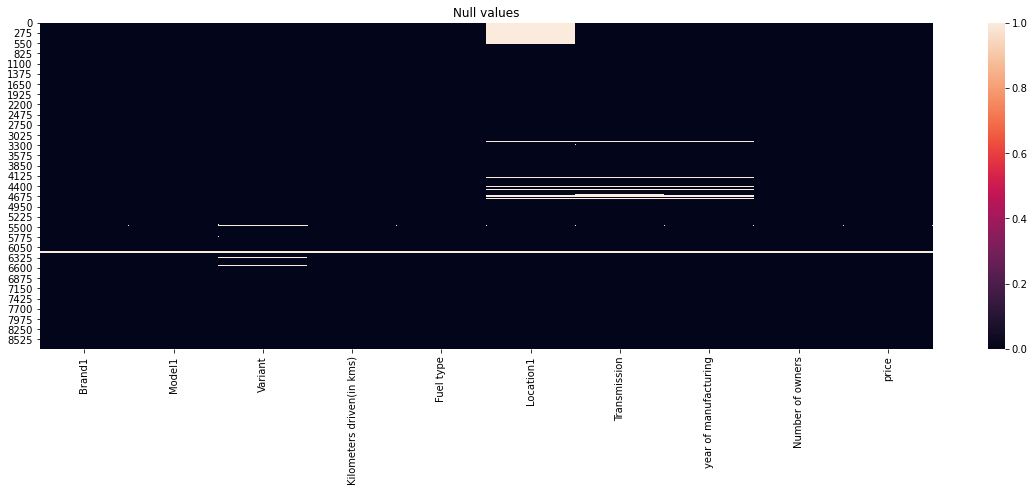

In [17]:
#we'll be using heatmap to see the null values
plt.figure(figsize = [20,6])
sns.heatmap(dataset.isnull())
plt.title('Null values')
plt.show()

observations: from here we can see that the location1 contains the most number of null values in the beginning of the dataset. 

In [112]:
#now we'll do statistical analysis of the dataset
dataset.describe(include = 'all')

Brand1 Model1 Variant  Kilometers driven(in kms) Fuel type  Location1  \
count     8651   8651    8651               8.651000e+03      8651       8651   
unique      39    477    2151                        NaN         8         97   
top     maruti  swift     vxi                        NaN    petrol  new delhi   
freq      2923    471     427                        NaN      4620       2701   
mean       NaN    NaN     NaN               5.736002e+04       NaN        NaN   
std        NaN    NaN     NaN               4.646866e+04       NaN        NaN   
min        NaN    NaN     NaN               0.000000e+00       NaN        NaN   
25%        NaN    NaN     NaN               3.145300e+04       NaN        NaN   
50%        NaN    NaN     NaN               5.300000e+04       NaN        NaN   
75%        NaN    NaN     NaN               7.341100e+04       NaN        NaN   
max        NaN    NaN     NaN               1.080000e+06       NaN        NaN   

       Transmission  year of manufacturing Number of owners         price  
count          8651            8651.000000             8651  8.651000e+03  
unique            3                    NaN                8           NaN  
top          manual                    NaN              1st           NaN  
freq           6426                    NaN             6693           NaN  
mean            NaN            2014.688938              NaN  8.243043e+05  
std             NaN               3.322753              NaN  1.148216e+06  
min             NaN            1989.000000              NaN  1.800000e+04  
25%             NaN            2013.000000              NaN  3.250000e+05  
50%             NaN            2015.000000              NaN  4.958990e+05  
75%             NaN            2017.000000              NaN  8.250000e+05  
max             NaN            2021.000000              NaN  2.250000e+07

In [19]:
#droping the null value from the attributes
#dropping null values from variant
dataset = dataset.dropna(subset =['Variant'])

In [30]:
#using replace function to replace the nan values with mode of the attribute
dataset["Model1"] = dataset["Model1"].replace(np.nan , 'swift')

In [36]:
#using replace function to replace the nan values with mode of the attribute
dataset["Transmission"] = dataset["Transmission"].replace(np.nan , 'manual')

In [34]:
#using fillna funtion to replace null values with median of the attribute
dataset["year of manufacturing"] = dataset["year of manufacturing"].fillna(dataset["year of manufacturing"].median())

In [38]:
#using replace function to replace the nan values with mode of the attribute
dataset["Number of owners"] = dataset["Number of owners"].replace(np.nan , '1st')

In [40]:
#using fillna funtion to replace null values with median of the attribute
dataset["price"] = dataset["price"].fillna(dataset["price"].median())

In [42]:
#using fillna funtion to replace null values with median of the attribute
dataset["Location1"] = dataset["Location1"].replace(np.nan , 'new delhi')

In [43]:
dataset.isnull().sum()

Brand1                       0
Model1                       0
Variant                      0
Kilometers driven(in kms)    0
Fuel type                    0
Location1                    0
Transmission                 0
year of manufacturing        0
Number of owners             0
price                        0
dtype: int64

So, we successfully replaced and removed the null values from the dataset

In [44]:
#removed null values

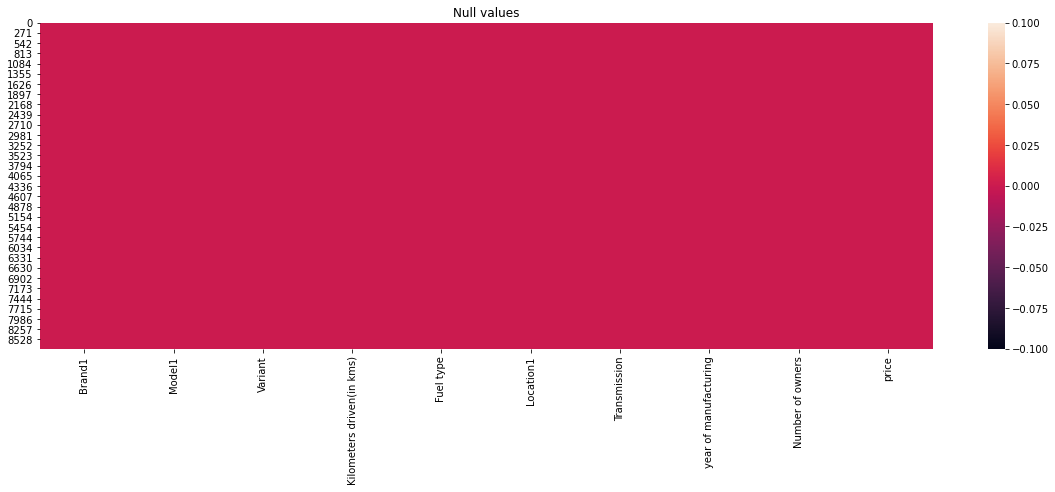

In [45]:
#we'll be using heatmap to see the null values
plt.figure(figsize = [20,6])
sns.heatmap(dataset.isnull())
plt.title('Null values')
plt.show()

In [111]:
#now we'll do statistical analysis of the dataset
dataset.describe(include = 'all')

Brand1 Model1 Variant  Kilometers driven(in kms) Fuel type  Location1  \
count     8651   8651    8651               8.651000e+03      8651       8651   
unique      39    477    2151                        NaN         8         97   
top     maruti  swift     vxi                        NaN    petrol  new delhi   
freq      2923    471     427                        NaN      4620       2701   
mean       NaN    NaN     NaN               5.736002e+04       NaN        NaN   
std        NaN    NaN     NaN               4.646866e+04       NaN        NaN   
min        NaN    NaN     NaN               0.000000e+00       NaN        NaN   
25%        NaN    NaN     NaN               3.145300e+04       NaN        NaN   
50%        NaN    NaN     NaN               5.300000e+04       NaN        NaN   
75%        NaN    NaN     NaN               7.341100e+04       NaN        NaN   
max        NaN    NaN     NaN               1.080000e+06       NaN        NaN   

       Transmission  year of manufacturing Number of owners         price  
count          8651            8651.000000             8651  8.651000e+03  
unique            3                    NaN                8           NaN  
top          manual                    NaN              1st           NaN  
freq           6426                    NaN             6693           NaN  
mean            NaN            2014.688938              NaN  8.243043e+05  
std             NaN               3.322753              NaN  1.148216e+06  
min             NaN            1989.000000              NaN  1.800000e+04  
25%             NaN            2013.000000              NaN  3.250000e+05  
50%             NaN            2015.000000              NaN  4.958990e+05  
75%             NaN            2017.000000              NaN  8.250000e+05  
max             NaN            2021.000000              NaN  2.250000e+07

In [205]:
# writing the observations obtained from the statistical summary
print("observations:")
for i in dataset_numerical:
    print("Mean of the ",i,"is :", round(dataset[i].mean(),3))
    print("Median of the ",i,"is :",round(dataset[i].median(),3))
    print("Standard deviation of ",i,"is :" , round(dataset[i].std(),3))
    print("Minimum value of ",i,"is :", round(dataset[i].min(),3))
    print("Maximum value of ",i,"is :", round(dataset[i].max(),3))
    
    x = input('conclusion : \n')
    print("\n\n")

observations:
Mean of the  Kilometers driven(in kms) is : 57360.02
Median of the  Kilometers driven(in kms) is : 53000.0
Standard deviation of  Kilometers driven(in kms) is : 46468.663
Minimum value of  Kilometers driven(in kms) is : 0.0
Maximum value of  Kilometers driven(in kms) is : 1080000.0
conclusion : 
The difference between the mean and median is almost quite big.The standard deviation is also high.And after looking at the maximum value and 75th percentile we can say that may be some outliers are present in the feature.



Mean of the  year of manufacturing is : 2014.689
Median of the  year of manufacturing is : 2015.0
Standard deviation of  year of manufacturing is : 3.323
Minimum value of  year of manufacturing is : 1989.0
Maximum value of  year of manufacturing is : 2021.0
conclusion : 
The mean and median are almost equal. The standard deviation of this feature is very low. The difference between the 75th percentile and maximum year is very low.





In [ ]:
#Getting started with the Univaritate analysis of the numerical Features

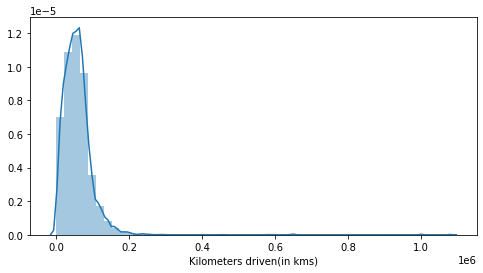

In [47]:
#first using distribution plot
plt.figure(figsize=[8,4])
sns.distplot(dataset["Kilometers driven(in kms)"])

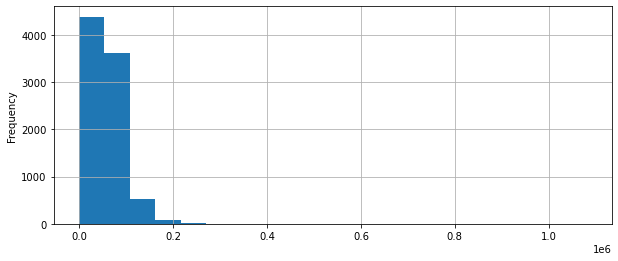

In [208]:
plt.figure(figsize=[10,4])
dataset["Kilometers driven(in kms)"].plot.hist(grid=True, bins=20)

observations:Here we observed that more than 4000 cars have driven kilometers more than 50 thousands.

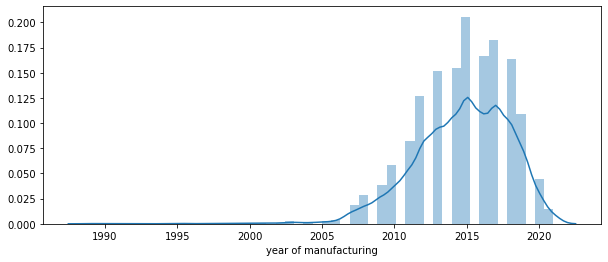

In [209]:
#first using distribution plot
plt.figure(figsize=[10,4])
sns.distplot(dataset["year of manufacturing"])

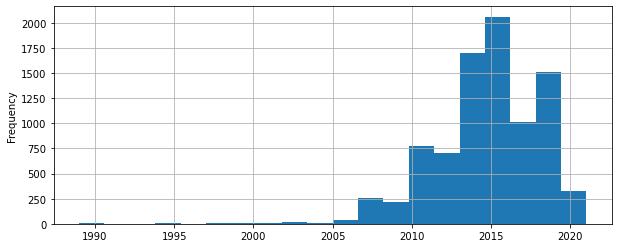

In [50]:
plt.figure(figsize=[10,4])
dataset["year of manufacturing"].plot.hist(grid=True, bins=20)

observation:here we obvserved that most the of the cars were manufactured between year 2014 and 2018 i.e more than 80% of the total cars. 

## target feature

### Price

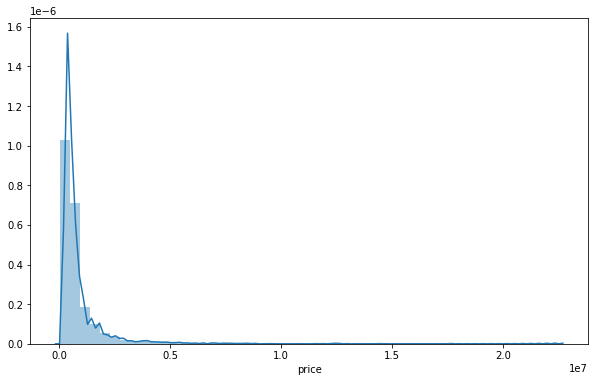

In [58]:
#first using distribution plot
plt.figure(figsize=[10,6])
sns.distplot(dataset["price"])

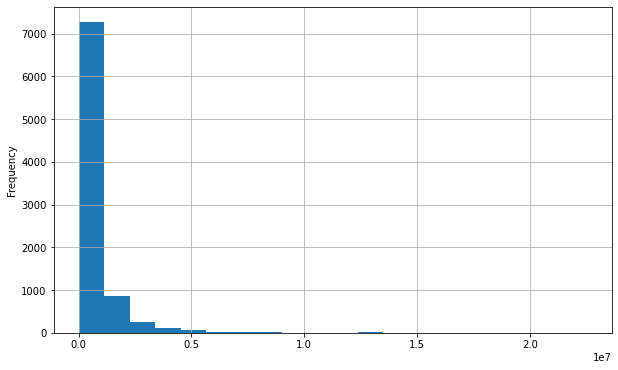

In [59]:
plt.figure(figsize=[10,6])
dataset["price"].plot.hist(grid=True, bins=20)

Observations : More than 7000 cars has a price range of 4.95 lakhs to 8 lakhs.

# Getting started with the Univaritate analysis of the categorical Features

In [61]:
dataset_categorical

['Brand1',
 'Model1',
 'Variant',
 'Fuel type',
 'Location1',
 'Transmission',
 'Number of owners']

### Brand1

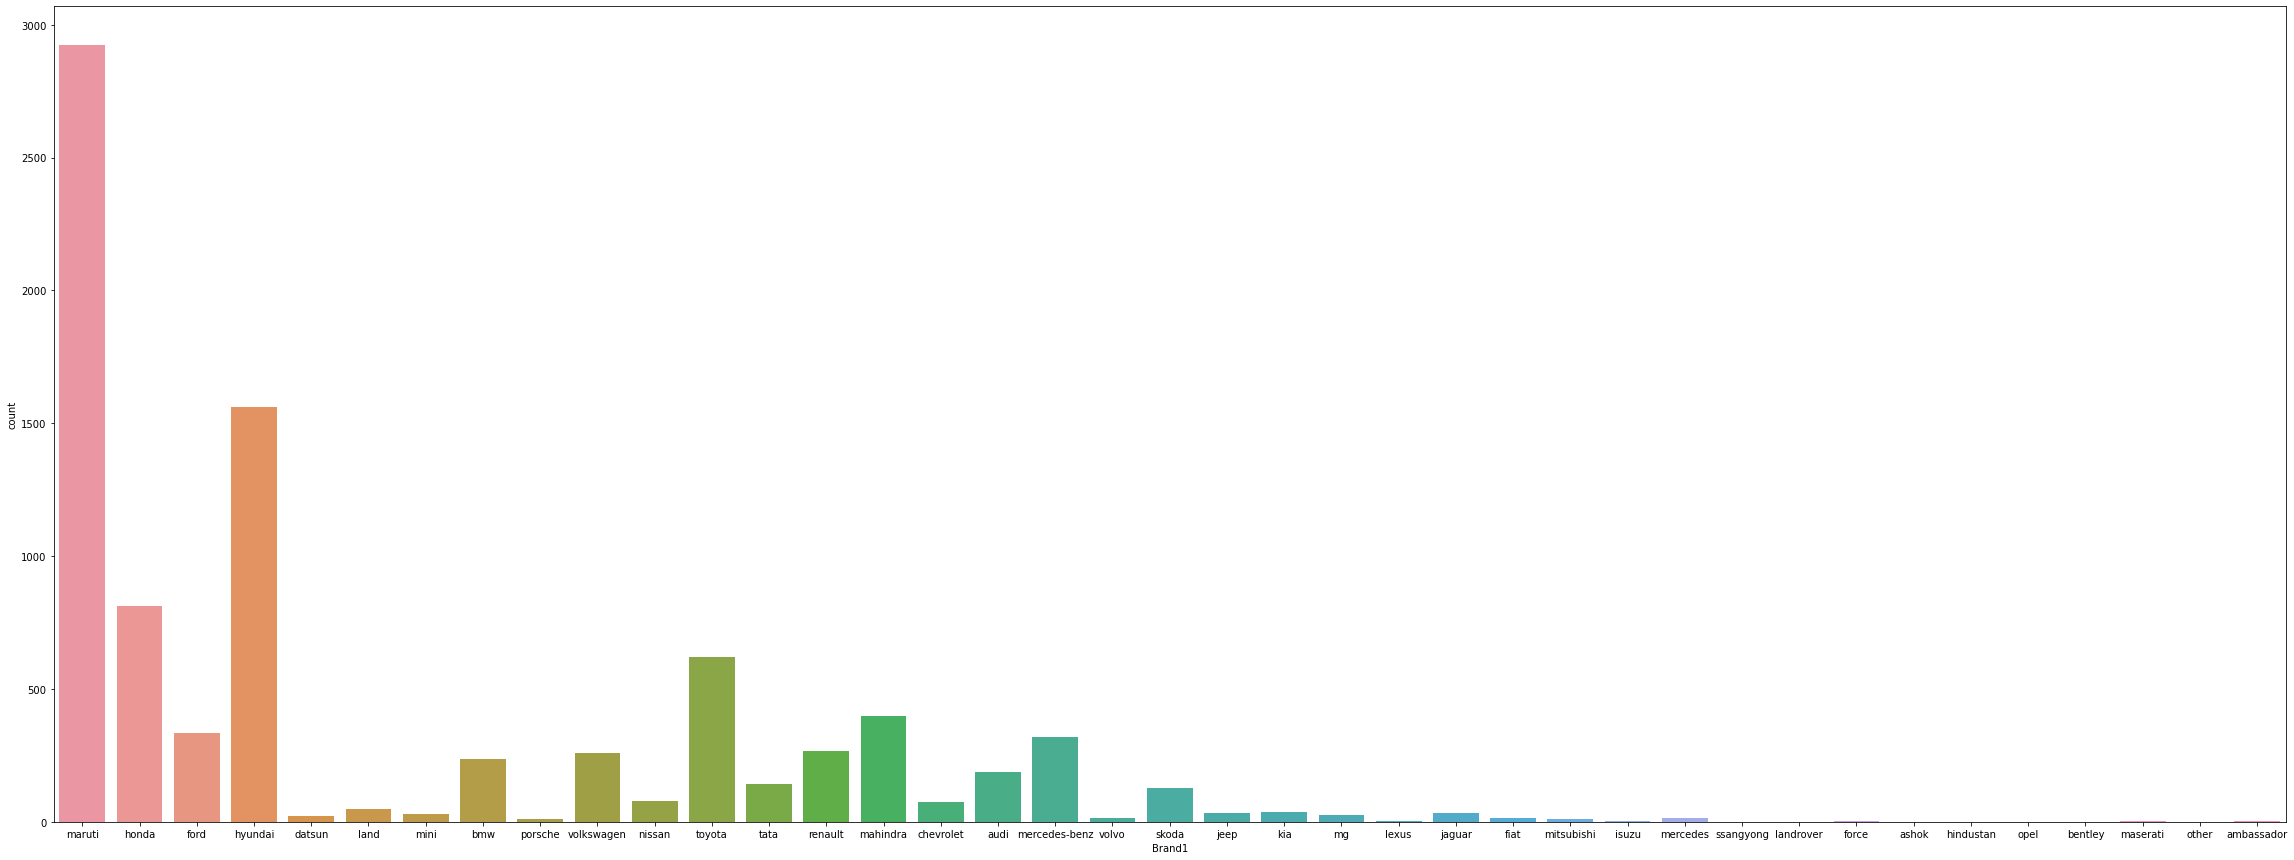

In [67]:
#Brand1
plt.figure(figsize = [40,15])
sns.countplot(dataset['Brand1'])
plt.show()

In [68]:
#here we'll see the unique values of the feature
dataset['Brand1'].unique(),len(dataset['Brand1'].unique())

(array(['maruti', 'honda', 'ford', 'hyundai', 'datsun', 'land', 'mini',
        'bmw', 'porsche', 'volkswagen', 'nissan', 'toyota', 'tata',
        'renault', 'mahindra', 'chevrolet', 'audi', 'mercedes-benz',
        'volvo', 'skoda', 'jeep', 'kia', 'mg', 'lexus', 'jaguar', 'fiat',
        'mitsubishi', 'isuzu', 'mercedes', 'ssangyong', 'landrover',
        'force', 'ashok', 'hindustan', 'opel', 'bentley', 'maserati',
        'other', 'ambassador'], dtype=object),
 39)

In [69]:
dataset['Brand1'].value_counts()

maruti           2923
hyundai          1562
honda             811
toyota            619
mahindra          397
ford              336
mercedes-benz     319
renault           265
volkswagen        260
bmw               236
audi              187
tata              141
skoda             126
nissan             78
chevrolet          74
land               47
kia                38
jeep               35
jaguar             33
mini               28
mg                 26
datsun             23
mercedes           16
fiat               15
volvo              14
porsche            12
mitsubishi         10
isuzu               4
lexus               3
maserati            2
ambassador          2
force               2
opel                1
other               1
landrover           1
ssangyong           1
hindustan           1
ashok               1
bentley             1
Name: Brand1, dtype: int64

Observations: Brand attribute contains 39 different brands where most number of cars has brand named Maruti in the dataset,followed by hyundai and honda.

### Model1

In [72]:
#Model1
#here we'll see the unique values of the feature
dataset['Model1'].unique(),len(dataset['Model1'].unique())

(array(['alto k10', 'city', 'ecosport', 'i20', 'redigo', 'grand i10',
        'swift', 'verna', 'rover range rover velar', 'cooper clubman',
        'x1', 'panamera', 'cayenne', 'wagon r', 'brio', 'baleno', 'vento',
        'eeco', 'ciaz', 's-presso', 'vitara brezza', 'alto 800',
        'wagon r stingray', 'ignis', 'swift dzire', 'ameo', 'micra active',
        'santa fe', 'ritz', 'eon', 'etios liva', 'freestyle', 'polo',
        'i20 active', 'jazz', 'sx4 s cross', 'nexon', 'santro', 'elantra',
        'celerio', 'amaze', 'etios', 'wr-v', 'venue', 'tigor', 'accord',
        'duster', 'kwid', 'i10', 'xcent', 'kuv 100', 'yaris', 'tiago',
        'innova', 'figo aspire', 'triber', 'sunny', 'corolla altis',
        'br-v', 'alto', 'santro xing', 'figo', 'xuv500', 'cr-v', 'creta',
        'civic', 'xuv300', 'terrano', 'thar', 'ertiga', 'beat', 'fortuner',
        'zest', 'a6', 'endeavour', 'tuv 300', 'fiesta', 'new c-class',
        'gle class', '5 series', '6 series', 'rover discovery sp

In [73]:
dataset['Model1'].value_counts()

swift                       471
swift dzire                 332
city                        304
i20                         256
baleno                      229
grand i10                   225
wagon r                     205
creta                       191
vitara brezza               189
verna                       173
ecosport                    170
i10                         157
ciaz                        143
innova                      139
xuv500                      128
amaze                       126
polo                        123
ertiga                      118
alto k10                    113
alto 800                    113
duster                      105
kwid                         94
celerio                      90
suzuki swift                 84
ritz                         83
fortuner                     82
corolla altis                75
jazz                         74
brio                         73
innova crysta                72
e-class                      72
elite i2

Observations: Model attribute contains 477 different models where most number of cars has model as swift in the dataset,followed by swift dzire and city.

### Variant

In [74]:
#Variant
#here we'll see the unique values of the feature
dataset['Variant'].unique(),len(dataset['Variant'].unique())

(array(['vxi', 'i vtec v', 'i vtec cvt vx', ..., '2.5 g4 diesel 7-seater',
        '320d sport', 'dicor 2.2 ex 4x2 bs iv'], dtype=object),
 2151)

In [75]:
dataset['Variant'].value_counts()

vxi                                             427
lxi                                             322
vdi                                             302
zdi                                             104
vdi abs                                          65
vdi bs iv                                        64
magna                                            59
zxi                                              55
others                                           54
sportz 1.2                                       53
sportz                                           47
delta 1.2 k12                                    42
g                                                40
vxi bs iv                                        39
1.6 sx                                           37
ldi                                              37
vdi bsiv                                         33
zdi plus                                         32
1.2 delta                                        31
gd          

Observations: variant attribute contains 2151 different variants where highest number of cars has variant as vxi(considered as top model) in the dataset,followed by lxi and vdi.

### Fuel type

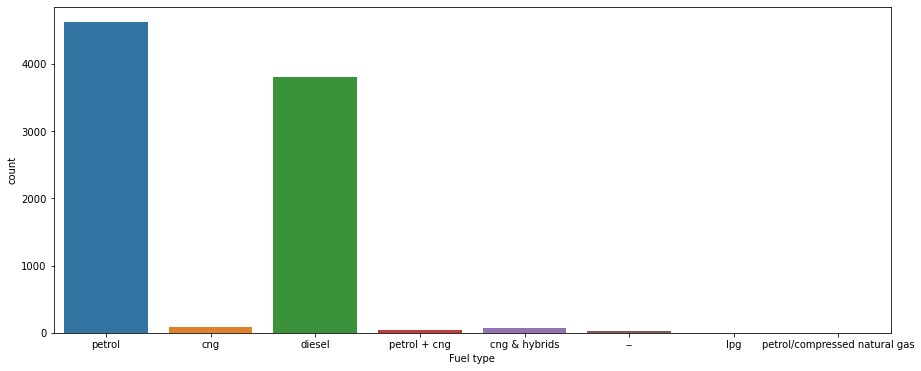

In [81]:
#Fuel type
plt.figure(figsize = [15,6])
sns.countplot(dataset['Fuel type'])
plt.show()

In [82]:
#Fuel type
#here we'll see the unique values of the feature
dataset['Fuel type'].unique(),len(dataset['Fuel type'].unique())

(array(['petrol', 'cng', 'diesel', 'petrol + cng', 'cng & hybrids', '--',
        'lpg', 'petrol/compressed natural gas'], dtype=object),
 8)

In [83]:
dataset['Fuel type'].value_counts()

petrol                           4620
diesel                           3801
cng                                92
cng & hybrids                      73
petrol + cng                       39
--                                 23
lpg                                 2
petrol/compressed natural gas       1
Name: Fuel type, dtype: int64

Observations: Fuel type  attribute contains 8 different fuel type out of which one is "--" we'll replace it in further steps. Here most number of cars petrol fuel type followes by diesel.

### Location1

In [110]:
#Location1
dataset['Location1'].unique(),len(dataset['Location1'].unique())

(array(['new delhi', 'ghaziabad', 'faridabad', 'gurgaon', 'noida',
        'greater noida', 'modinagar', 'delhi', ' kochi', ' thodupuzha',
        ' thiruvananthapuram', ' kozhikode', ' kottayam',
        ' perinthalmanna', ' kollam', ' kannur', ' malappuram',
        ' kadungalloor', ' cheruthazham', ' kolazhy', ' arookutty',
        ' mattannur', ' thiruvalla', ' pantheeramkavu', ' kottakal',
        ' perumbavoor', ' tirur', ' karunagappally', ' wayanad',
        ' alathur', ' tirurangadi', ' kondotty', ' manjeri',
        ' pathanamthitta', ' pariyaram', ' palai', ' cheriyamundam',
        ' thalassery', ' angamaly', ' thrissur', ' taliparamba',
        ' neyyattinkara', ' paravur', ' nedumpana', ' palakkad',
        ' mavelikkara', ' nedumangad',
        ' alamcode thiruvananthapuram district', ' venganoor', ' nilambur',
        ' kasaragod', ' vaniyamkulam ii', ' edathiruthy', ' ongallur ii',
        ' kuttippuram', ' balusseri', ' kizhuparamba',
        ' alamcode malappuram dis

In [109]:
dataset['Location1'].value_counts()

new delhi                                   2701
delhi                                       2035
faridabad                                    596
gurgaon                                      513
 mumbai                                      510
noida                                        495
 thiruvananthapuram                          333
ghaziabad                                    318
 kochi                                       286
mumbai                                       227
 kottayam                                    225
  kannur                                      80
 kollam                                       38
 kozhikode                                    35
 perumbavoor                                  32
 thrissur                                     21
 malappuram                                   19
 kannur                                       12
 kottakal                                     12
 muvattupuzha                                  8
 mannarkad i        

Observations: Location attribute contains 97 different LOcations where most number of cars are from New Delhi followed by delhi and faridabad in the dataset.

### Transmission

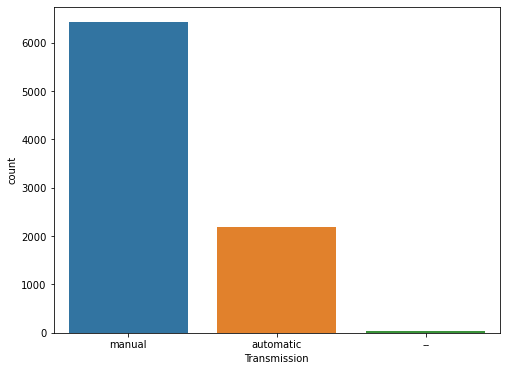

In [114]:
#Transmission
plt.figure(figsize = [8,6])
sns.countplot(dataset['Transmission'])
plt.show()

In [115]:
dataset['Transmission'].unique(),len(dataset['Transmission'].unique())

(array(['manual', 'automatic', '--'], dtype=object), 3)

In [116]:
dataset['Transmission'].value_counts()

manual       6426
automatic    2185
--             40
Name: Transmission, dtype: int64

Observations: Transmission attribute contains 3 different type of transmission.it also contains "--" which we'll treat as null values and replace it. most number of cars has transmission type as Manual.

### Number of owners

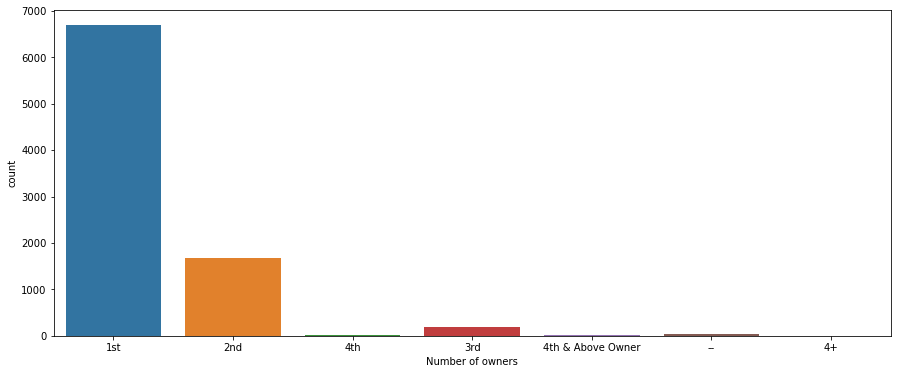

In [122]:
#Number of owners
plt.figure(figsize = [15,6])
sns.countplot(dataset['Number of owners'])
plt.show()

In [123]:
dataset['Number of owners'].unique(),len(dataset['Number of owners'].unique())

(array(['1st', '2nd', '4th', '3rd', '4th & Above Owner', '--', '4+'],
       dtype=object),
 7)

In [150]:
dataset['Number of owners'].value_counts()

1.0    6693
2.0    1686
3.0     189
0.0      44
5.0      24
6.0      10
4.0       5
Name: Number of owners, dtype: int64

Observations: Number of owners attribute contains 7 different categories.it also contains "--" which we'll treat as null values and replace it. Here most of the cars beongs to 1st owner category in the dataset.

<Figure size 1080x432 with 0 Axes>

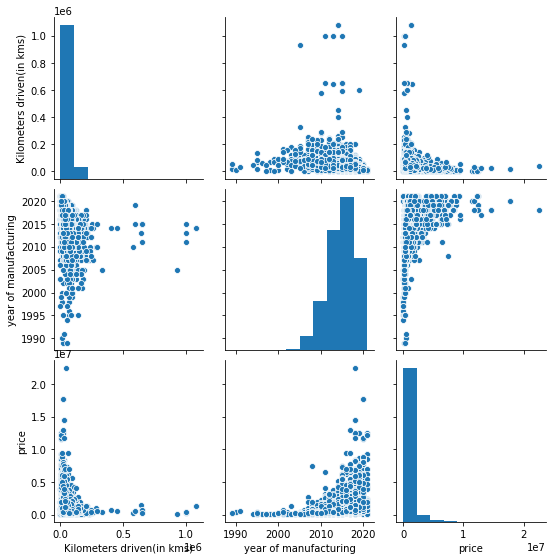

In [128]:
plt.figure(figsize = [15,6])
sns.pairplot(dataset)

Observations: 
1. Here we observedd that as the manufacturing year increases means newer the car more is the price of the car.
2. as the kilometer driven increases price of the car decreases.         

In [129]:
#Lets use ordinal encoder for encoding the categorical features and then we'll go for bi variant analysis
dataset_encoder = dataset.copy() #created a seperate dataset to encode the data

In [130]:
dataset_encoder.head()

Brand1    Model1                      Variant  Kilometers driven(in kms)  \
0  maruti  alto k10                          vxi                    27017.0   
1   honda      city                     i vtec v                    14815.0   
2  maruti  alto k10                          vxi                    32053.0   
3   honda      city                i vtec cvt vx                    79502.0   
4    ford  ecosport  1.5 ti vct mt ambiente bsiv                    30953.0   

  Fuel type  Location1 Transmission  year of manufacturing Number of owners  \
0    petrol  new delhi       manual                 2013.0              1st   
1    petrol  new delhi       manual                 2017.0              1st   
2    petrol  new delhi       manual                 2016.0              1st   
3    petrol  new delhi    automatic                 2015.0              1st   
4    petrol  new delhi       manual                 2018.0              1st   

      price  
0  285468.0  
1  814432.0  
2  302208.0  
3  690772.0  
4  743820.0

In [131]:
#using ordinal encoder to encode categorical features
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in dataset_categorical:
    dataset_encoder[i] = oe.fit_transform(dataset_encoder[[i]])

In [132]:
#lets use the correlation matrix to see the correlation between the features
corr_matrix =dataset_encoder.corr()
corr_matrix

Brand1    Model1   Variant  \
Brand1                     1.000000  0.177999  0.044744   
Model1                     0.177999  1.000000  0.271469   
Variant                    0.044744  0.271469  1.000000   
Kilometers driven(in kms)  0.078851  0.041758 -0.053186   
Fuel type                 -0.086106 -0.126519  0.025222   
Location1                 -0.038263 -0.065301  0.029943   
Transmission               0.095331  0.096370  0.118497   
year of manufacturing     -0.005866 -0.034395  0.011018   
Number of owners          -0.013667 -0.004508 -0.037295   
price                     -0.064052 -0.051626 -0.060704   

                           Kilometers driven(in kms)  Fuel type  Location1  \
Brand1                                      0.078851  -0.086106  -0.038263   
Model1                                      0.041758  -0.126519  -0.065301   
Variant                                    -0.053186   0.025222   0.029943   
Kilometers driven(in kms)                   1.000000  -0.258812  -0.055459   
Fuel type                                  -0.258812   1.000000   0.011512   
Location1                                  -0.055459   0.011512   1.000000   
Transmission                                0.103526   0.041944   0.063943   
year of manufacturing                      -0.372458  -0.006354   0.206040   
Number of owners                            0.146285  -0.014101  -0.150591   
price                                      -0.154612  -0.152760   0.029503   

                           Transmission  year of manufacturing  \
Brand1                         0.095331              -0.005866   
Model1                         0.096370              -0.034395   
Variant                        0.118497               0.011018   
Kilometers driven(in kms)      0.103526              -0.372458   
Fuel type                      0.041944              -0.006354   
Location1                      0.063943               0.206040   
Transmission                   1.000000              -0.150100   
year of manufacturing         -0.150100               1.000000   
Number of owners              -0.016338              -0.337366   
price                         -0.476349               0.317753   

                           Number of owners     price  
Brand1                            -0.013667 -0.064052  
Model1                            -0.004508 -0.051626  
Variant                           -0.037295 -0.060704  
Kilometers driven(in kms)          0.146285 -0.154612  
Fuel type                         -0.014101 -0.152760  
Location1                         -0.150591  0.029503  
Transmission                      -0.016338 -0.476349  
year of manufacturing             -0.337366  0.317753  
Number of owners                   1.000000 -0.066635  
price                             -0.066635  1.000000

Text(0.5, 1.0, 'Correlationship between house attributes')

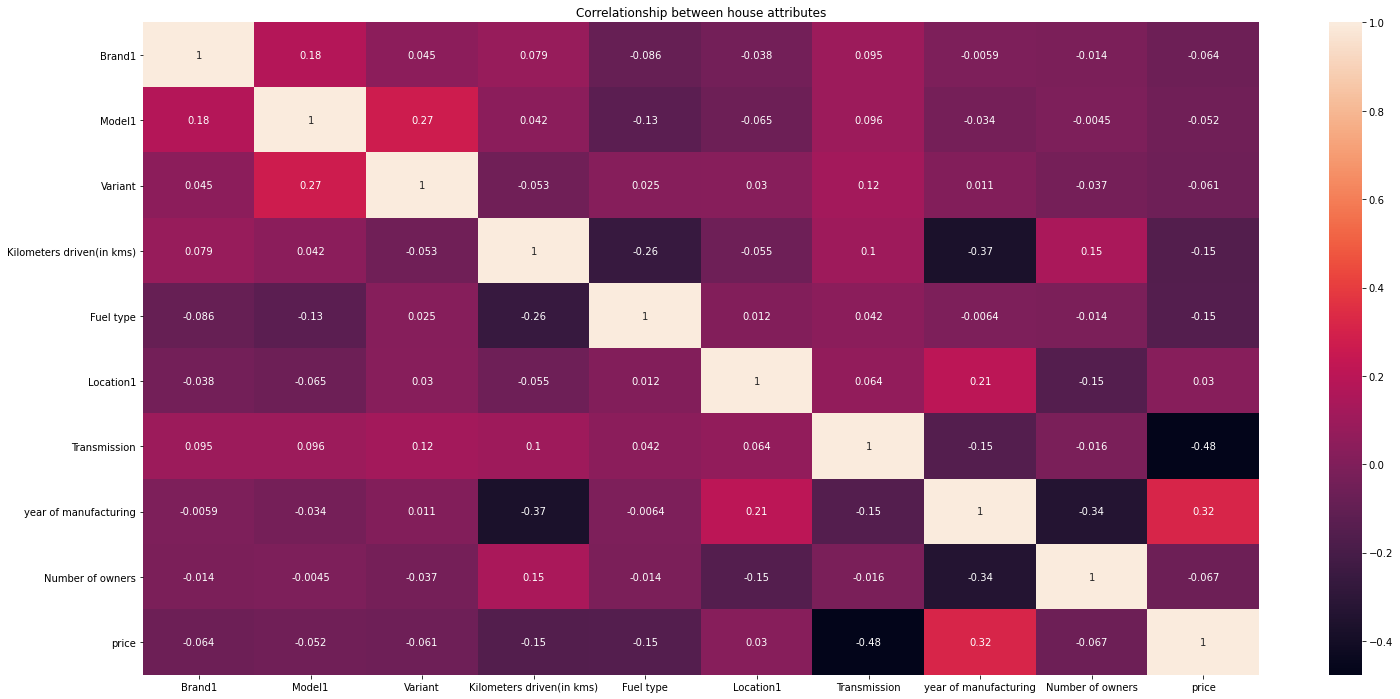

In [210]:
#using heatmap to see the correlation
fig, ax = plt.subplots(figsize=(25,12))
sns.heatmap(dataset_encoder.corr(),annot = True)
plt.title('Correlationship between house attributes')

Observations : Here we observed the following things:
1. fuel type and kilometer driven are negatively correlated to each other,which means if one increase other decrease and viceversa.
2.same with year of manufacturing and kilometers driven.
3. transmission anf price are also neagtively correlated to each other.
4. whereas, year of manufacturing and price are positively co related which means if one increases other also increases and vice versa.
5. variant and model are also positively correlated to each other.
6. Most of the features do not show much correlation with each other.

In [211]:
#using pairplot to see the relationship among all the features

<Figure size 1080x432 with 0 Axes>

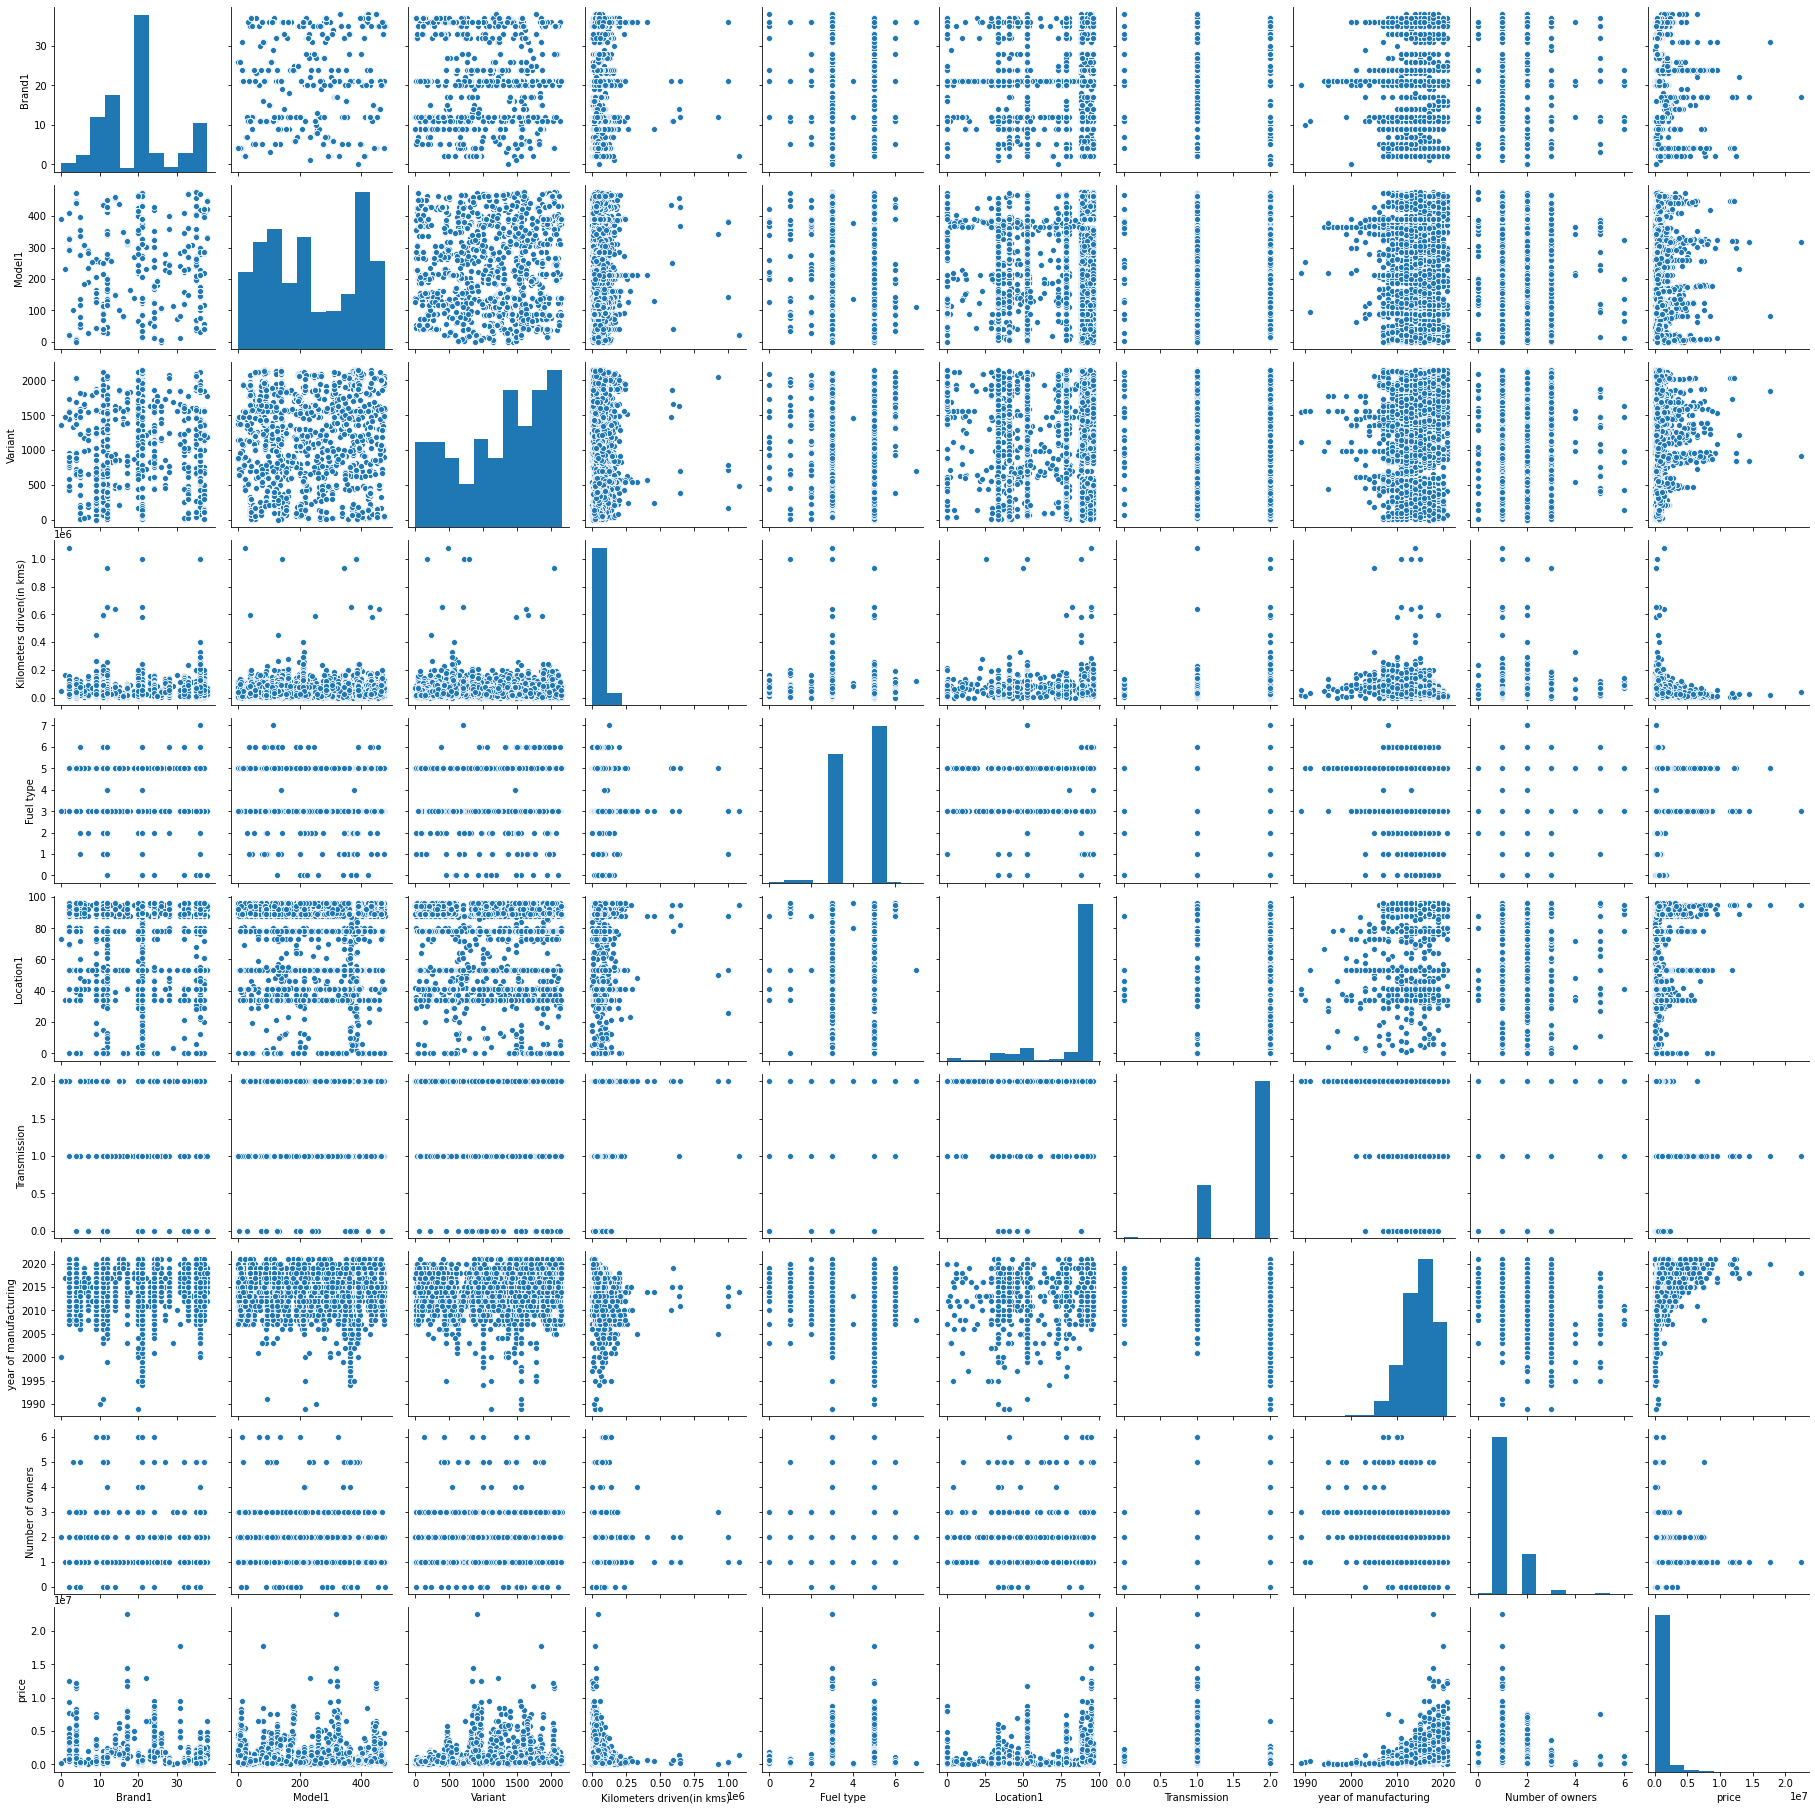

In [135]:
plt.figure(figsize = [15,6])
sns.pairplot(dataset_encoder)

In [212]:
#using correlation matrix to see the relationship of each attribute with the target feature.

In [137]:
corr_matrix['price'].sort_values(ascending = False)

price                        1.000000
year of manufacturing        0.317753
Location1                    0.029503
Model1                      -0.051626
Variant                     -0.060704
Brand1                      -0.064052
Number of owners            -0.066635
Fuel type                   -0.152760
Kilometers driven(in kms)   -0.154612
Transmission                -0.476349
Name: price, dtype: float64

Observations: As we saw earlier in heatmap that year of manufacturing is positively correlated to price and transmission is negatively correlated to the car price

### Using boxplot to plot outliers

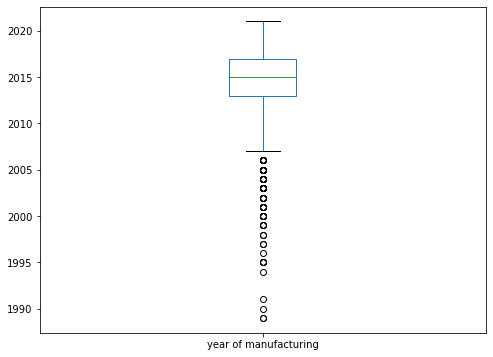

In [139]:
#Year of manufacturing
plt.figure(figsize = [8,6])
dataset['year of manufacturing'].plot.box()

Observations: most of the outliers are present at the lower whisker.

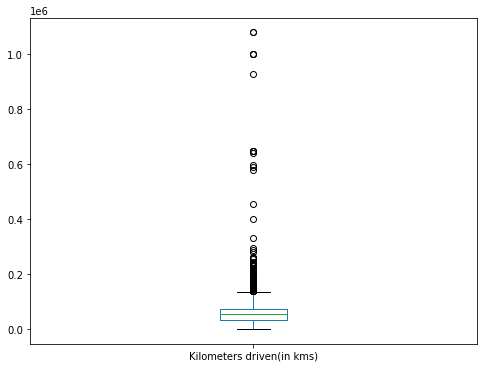

In [140]:
#Kilomiteres driven
plt.figure(figsize = [8,6])
dataset['Kilometers driven(in kms)'].plot.box()

Observationns:Most of the outliers are present near the upper whisker.

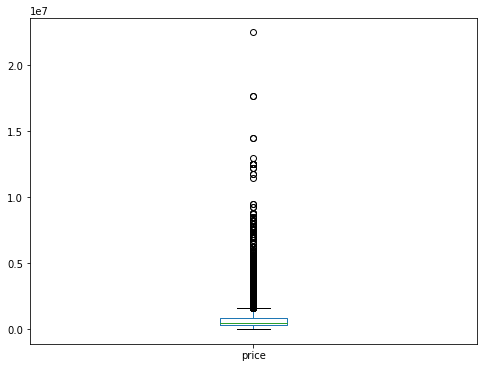

In [141]:
#price
plt.figure(figsize = [8,6])
dataset['price'].plot.box()

Observations: Here we saw that lots of outliers present near the upper whisker of the boxplot.Since its our target variable we'll not remove any outlier from it.

In [144]:
#Encoding the data and then we'll be removing outliers

#using ordinal encoder and label encoder to encode categorical features
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in dataset_categorical:
    dataset[i] = oe.fit_transform(dataset[[i]])

In [214]:
#After successfully encoding our categorical variables we'll be removing outliers

In [145]:
#removing outliers using z score 

dataset_outliers_remove = dataset[['year of manufacturing','Kilometers driven(in kms)']] # creating list of attributes to remove the ouliers


from scipy.stats import zscore

z = np.abs(zscore(dataset_outliers_remove))
threshold = 3
print(np.where(z>3))

(array([ 784, 1059, 1089, 1221, 1378, 1698, 2068, 2114, 2343, 2367, 2376,
       2750, 2767, 3266, 4335, 4428, 4537, 4558, 4585, 4606, 4662, 4683,
       4702, 4718, 4730, 4862, 5049, 5068, 5109, 5359, 5490, 5569, 5590,
       5611, 5616, 5618, 5627, 5628, 5629, 5632, 5641, 5642, 5649, 5658,
       5666, 5674, 5677, 5681, 5694, 5700, 5705, 5744, 5754, 5760, 5772,
       5791, 5792, 5797, 5801, 5812, 5813, 5847, 5865, 5894, 5897, 5903,
       5949, 5951, 5967, 5968, 5986, 5994, 6002, 6005, 6017, 6035, 6106,
       6191, 6228, 6263, 6411, 6427, 6441, 6520, 6523, 6527, 6529, 6530,
       6534, 6538, 6539, 6541, 6555, 6854, 7004, 7634, 7642, 7758, 7777,
       7842, 7846, 7958, 8123, 8201, 8355, 8541, 8638], dtype=int64), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0

In [146]:
for i in dataset_outliers_remove:
    dataset[i] = dataset_outliers_remove[i]
    
dataset_new = dataset[(z<3).all(axis = 1)]

In [147]:
dataset_new.shape

(8544, 10)

In [148]:
data_lose = ((dataset.shape[0] - dataset_new.shape[0])/dataset.shape[0])*100
data_lose

1.2368512310715525

Total data lost after removing the outliers is 1.24 percent.

In [153]:
dataset_new

Brand1  Model1  Variant  Kilometers driven(in kms)  Fuel type  \
0       21.0    37.0   1937.0                    27017.0        5.0   
1       11.0    89.0   1417.0                    14815.0        5.0   
2       21.0    37.0   1937.0                    32053.0        5.0   
3       11.0    89.0   1413.0                    79502.0        5.0   
4        9.0   128.0    309.0                    30953.0        5.0   
5       12.0   201.0     73.0                    46629.0        5.0   
6        6.0   307.0    987.0                    15598.0        5.0   
7       21.0    37.0   1491.0                    55252.0        1.0   
8       12.0   187.0   1734.0                    39842.0        5.0   
9       12.0   201.0   1519.0                    64390.0        3.0   
10      11.0    89.0   1428.0                    43742.0        5.0   
11      21.0   391.0   1937.0                    24477.0        5.0   
12      12.0   428.0   1910.0                     8742.0        5.0   
13      12.0   201.0   1063.0                    50024.0        5.0   
14      17.0   322.0   1592.0                    41000.0        3.0   
15      26.0   106.0   1144.0                    15000.0        5.0   
16       4.0   440.0   1690.0                    48000.0        3.0   
17      31.0   282.0   1219.0                    55000.0        3.0   
18      31.0    82.0   1853.0                    19000.0        5.0   
19      21.0   433.0   1937.0                    93736.0        5.0   
20      12.0   187.0     87.0                    23943.0        5.0   
21      11.0    73.0   1913.0                    38558.0        5.0   
22      21.0    54.0   1202.0                    47434.0        5.0   
23      37.0   423.0    148.0                    71447.0        5.0   
24      11.0    73.0    167.0                    38559.0        5.0   
25      21.0   391.0   1495.0                    49881.0        5.0   
26      21.0   130.0    936.0                    75659.0        1.0   
27      21.0   391.0   1876.0                    55537.0        3.0   
28      21.0    87.0   1892.0                    76072.0        3.0   
29      21.0    37.0   1937.0                     7888.0        5.0   
30      21.0    54.0    181.0                   131296.0        3.0   
31      11.0    89.0   1631.0                    64284.0        5.0   
32      21.0   130.0   1125.0                    59392.0        1.0   
33      21.0   327.0   1979.0                     6646.0        5.0   
34      21.0   432.0   1888.0                    78612.0        3.0   
35      21.0    37.0   1479.0                    15979.0        5.0   
36      12.0   187.0     59.0                    61639.0        3.0   
37      21.0   391.0   1498.0                     5824.0        5.0   
38      21.0    36.0   1937.0                    18504.0        5.0   
39      11.0    73.0    127.0                    78279.0        5.0   
40      21.0   391.0   1495.0                    59535.0        5.0   
41      21.0   435.0   1937.0                    44660.0        5.0   
42      21.0   391.0   1495.0                    35019.0        5.0   
43      21.0    54.0     50.0                    23484.0        5.0   
44      21.0   205.0    134.0                     9024.0        5.0   
45      21.0   205.0     67.0                    47478.0        5.0   
46      21.0   205.0     67.0                    31692.0        5.0   
47      21.0   205.0    134.0                    39393.0        5.0   
48      12.0   201.0   1741.0                    40750.0        5.0   
49      21.0    54.0    180.0                    66476.0        3.0   
50      21.0   391.0   1883.0                    44828.0        3.0   
51      21.0   391.0   1876.0                    75526.0        3.0   
52      21.0   205.0    174.0                    29837.0        5.0   
53      21.0    54.0    173.0                    42924.0        5.0   
54      21.0    87.0    224.0                    43559.0        5.0   
55      21.0    54.0   1711.0 

In [169]:
#let's split the data into dependent and independent variables
x = dataset_new.drop(['price'],axis  = 1)
y = dataset_new['price']

In [170]:
#checking for the skewness present in the features
x.skew()

Brand1                       0.387187
Model1                       0.112119
Variant                     -0.416705
Kilometers driven(in kms)    0.864676
Fuel type                   -0.345112
Location1                   -2.197258
Transmission                -1.102452
year of manufacturing       -0.411459
Number of owners             2.916922
dtype: float64

In [172]:
#We will remove the skewness from the numerical features only and will try to keep the keep the skewness between -0.5 and +0.5
#power transformer to remove skewness 
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer()

x['Kilometers driven(in kms)'] = power.fit_transform(x[['Kilometers driven(in kms)']])

In [173]:
x.skew()

Brand1                       0.387187
Model1                       0.112119
Variant                     -0.416705
Kilometers driven(in kms)   -0.041842
Fuel type                   -0.345112
Location1                   -2.197258
Transmission                -1.102452
year of manufacturing       -0.411459
Number of owners             2.916922
dtype: float64

In [174]:
dataset_numerical = x[['Kilometers driven(in kms)', 'year of manufacturing']]

In [175]:
#scaling the data 
#Using standard scaler to scale the data.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for i in dataset_numerical:
    x[i]= sc.fit_transform(x[[i]])

In [176]:
x.head()

Brand1  Model1  Variant  Kilometers driven(in kms)  Fuel type  Location1  \
0    21.0    37.0   1937.0                  -0.827806        5.0       95.0   
1    11.0    89.0   1417.0                  -1.398193        5.0       95.0   
2    21.0    37.0   1937.0                  -0.628613        5.0       95.0   
3    11.0    89.0   1413.0                   0.803445        5.0       95.0   
4     9.0   128.0    309.0                  -0.670822        5.0       95.0   

   Transmission  year of manufacturing  Number of owners  
0           2.0              -0.583298               1.0  
1           2.0               0.711758               1.0  
2           2.0               0.387994               1.0  
3           1.0               0.064230               1.0  
4           2.0               1.035522               1.0

In [177]:
x.shape

(8544, 9)

In [179]:
#checking the best random state for the model where the accuracy of the model is highest.
from sklearn.linear_model import LinearRegression
Maxaccu = 0
Maxrow = 0
for i in range(1,4000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    prdlr = lr.predict(x_test)
    accu = r2_score(y_test,prdlr)
    if accu>Maxaccu:
        Maxaccu = accu
        Maxrow = i
print("max accuracy is : ",Maxaccu ,"at random state : ",Maxrow)

max accuracy is :  0.42815608992500553 at random state :  1312


In [187]:
#creating train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20,random_state = 1312)

In [184]:
#feature selection  technique1
from sklearn.ensemble import RandomForestRegressor
from mlxtend.feature_selection import SequentialFeatureSelector  as SFS
sfs = SFS(RandomForestRegressor(n_estimators = 100 , random_state = 0 , n_jobs = -1),
         k_features = 5,
         forward = True,
         floating = False,
         verbose = 2,
         scoring = 'r2',
         cv = 4,
         n_jobs = -1).fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    6.3s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    6.9s finished

[2021-10-01 16:21:39] Features: 1/5 -- score: 0.6426058214093868[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    9.4s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   10.4s finished

[2021-10-01 16:21:49] Features: 2/5 -- score: 0.7666266746527733[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    7.7s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:   11.9s finished

[2021-10-01 16:22:01] Features: 3/5 -- score: 0.8706993609966125[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | 

In [185]:
sfs.k_feature_names_

('Brand1',
 'Model1',
 'Transmission',
 'year of manufacturing',
 'Number of owners')

we tried checking for the best features that will give maximum accuracy but we observed that our model is also giving good accuracy with all the input features

In [188]:
#first using Linear regression to check the accuracy of the model,with the help of r2 score,Mean squared error and mean absolute error.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
prdlr = lr.predict(x_test)
print("Accuracy of the model :",r2_score(y_test,prdlr))
print("Mean Squared error :",mean_squared_error(y_test,prdlr))
print("Mean Absolute eroor :",mean_absolute_error(y_test,prdlr))

Accuracy of the model : 0.42815608992500553
Mean Squared error : 559365572603.6576
Mean Absolute eroor : 428528.17495832127


Observations : As we can see that the accuracy of the Linear regression model is 42.82% which is very low.And the mean absolute error is 428528, which is quite high.it means that our model is not learning efficiently.

In [189]:
#first using DecisionTreeRegressor to check the accuracy of the model,with the help of r2 score,Mean squared error and mean absolute error.
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor()
dtc.fit(x_train,y_train)
prdtc = dtc.predict(x_test)
print("Accuracy of the model :",r2_score(y_test,prdtc))
print("Mean Squared error :",mean_squared_error(y_test,prdtc))
print("Mean Absolute eroor :",mean_absolute_error(y_test,prdtc))

Accuracy of the model : 0.7562356816371416
Mean Squared error : 238445081112.25403
Mean Absolute eroor : 145832.79481178077


Observations : As we can see that the accuracy of the Decision tree regression model is 75.62% which is satisfactory.And the mean absolute error is 145832, which is low as compared to previous model.Also, our model is learning quite efficiently.


In [190]:
#first using RandomForestRegressor to check the accuracy of the model,with the help of r2 score,Mean squared error and mean absolute error.
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
rfc.fit(x_train,y_train)
prrfc = rfc.predict(x_test)
print("Accuracy of the model :",r2_score(y_test,prrfc))
print("Mean Squared error :",mean_squared_error(y_test,prrfc))
print("Mean Absolute eroor :",mean_absolute_error(y_test,prrfc))

Accuracy of the model : 0.8876597033250474
Mean Squared error : 109888893225.79056
Mean Absolute eroor : 131045.09236924963


Observations : As we can see that the accuracy of the Random forest regression model is 88.77% which is a good accuracy.And the mean absolute error is 131045, which is lowest as compared to previous models.Also, our model is learning effectively.

In [191]:
#first using KNeighborsRegressor to check the accuracy of the model,with the help of r2 score,Mean squared error and mean absolute error.
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(x_train,y_train)
prKNN = KNN.predict(x_test)
print("Accuracy of the model :",r2_score(y_test,prKNN))
print("Mean Squared error :",mean_squared_error(y_test,prKNN))
print("Mean Absolute eroor :",mean_absolute_error(y_test,prKNN))

Accuracy of the model : 0.6200126490617288
Mean Squared error : 371695559565.9975
Mean Absolute eroor : 241956.0168519602


Observations : As we can see that the accuracy of the KNeighbors regression model is 62.00% which is quite low.And the mean absolute error is 241956, which is high as compared to previous models.Also, our model is not learning efficiently.

In [192]:
#using boosting technique to build model
from sklearn.ensemble import GradientBoostingRegressor
gbc = GradientBoostingRegressor()
gbc.fit(x_train,y_train)
prdgbc = gbc.predict(x_test)
print("Accuracy of the model :",r2_score(y_test,prdgbc))
print("Mean Squared error :",mean_squared_error(y_test,prdgbc))
print("Mean Absolute eroor :",mean_absolute_error(y_test,prdgbc))

Accuracy of the model : 0.8211102810372415
Mean Squared error : 174986125265.17557
Mean Absolute eroor : 220802.10555285713


Observations : As we can see that the accuracy of the Gradient boosting regression model is 82.11% which is a good accuracy.And the mean absolute error is 220802, which is quite high as compared to previous models.Also, our model is also learning effectively.










*Conclusion from above models* : After checking the accuracy of all the models we observed that Random Forest regressor model shows Maximum accuracy i.e. around 88 percent.The next step is to check the cross validation score of these models in order to check wheather there is any biasness in the model or not.

## Cross Validation Score

In [194]:
#creating a function that will return the firrence of the cross validation score and accuracy of the model
def model_accuracy(accuracy,cross_validation_score):
    difference = accuracy - cross_validation_score
    print("The difference between the accuracy and cross validation score is : ",difference*100)

In [195]:
from sklearn.model_selection import cross_val_score

#Linear Regressor
cross_val1 = cross_val_score(LinearRegression(),x,y,cv = 5)
print("Cross Validation score for Linear regression : ",cross_val1.mean())

Cross Validation score for Linear regression :  0.1973329108925334


In [196]:
model_accuracy(r2_score(y_test,prdlr),cross_val1.mean())

The difference between the accuracy and cross validation score is :  23.082317903247212


In [197]:
#calculating cross validation score of Random forest regressor

cross_val2 = cross_val_score(RandomForestRegressor(),x,y,cv = 5)
print("Cross Validation Score for Random Forest Regressor",cross_val2.mean())

Cross Validation Score for Random Forest Regressor 0.7521595260921684


In [198]:
model_accuracy(r2_score(y_test,prrfc),cross_val2.mean())

The difference between the accuracy and cross validation score is :  13.5500177232879


In [199]:
#calculating cross validation score of Decision Tree regressor

cross_val3 = cross_val_score(DecisionTreeRegressor(),x,y,cv = 5)
print("Cross Validation Score for Decision tree regressor",cross_val3.mean())

Cross Validation Score for Decision tree regressor 0.5374107935729794


In [200]:
model_accuracy(r2_score(y_test,prdtc),cross_val3.mean())

The difference between the accuracy and cross validation score is :  21.882488806416223


In [201]:
#calculating cross validation score of KNeighborsRegressor regressor

cross_val4 = cross_val_score(KNeighborsRegressor(),x,y,cv = 5)
print("Cross Validation Score K Neighbors ",np.abs(cross_val4).mean())

Cross Validation Score K Neighbors  0.36135324572367394


In [202]:
model_accuracy(r2_score(y_test,prKNN),cross_val4.mean())

The difference between the accuracy and cross validation score is :  35.49546878051705


In [203]:
#calculating cross validation score of Gradien boosting regressor

cross_val5 = cross_val_score(gbc,x,y,cv = 5)
print("Cross validation score of Gradient Boosting classifier is ",cross_val5.mean())

Cross validation score of Gradient Boosting classifier is  0.6771914253003555


In [204]:
model_accuracy(r2_score(y_test,prdgbc),cross_val5.mean())

The difference between the accuracy and cross validation score is :  14.3918855736886



**Conclusion** :
After comparing the cross validation scores of the models we saw that Random forest Regressor model shows least difference and KNeighbors regressor model shows the maximum difference.But we saw earlier that Random forest regressor model has the highest accuracy and has least Mean Absolute error compared to other model.Also, the difference between the cross validation score and accuracy of this model is lowest as compared to other models.So , we'll be using Random forest regressor model as our final model.

## Hyperparameter tuning of Random Forest Regressor

In [221]:
from sklearn.model_selection import GridSearchCV
#creating parameter list to pass in GridSearchCV
parameters = {'bootstrap': [True, False],
              'n_estimators': [1,100],
             'criterion': ['squared_error','mse','absolute_error','mae'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split' : [1,10],
             'max_depth' : [1,10],
             'max_features' : ['auto', 'sqrt', 'log2']}

In [222]:
GVC = GridSearchCV(RandomForestRegressor(),parameters,cv = 5)
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'mae'],
                         'max_depth': [1, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [1, 10],
                         'n_estimators': [1, 100]})

In [223]:
GVC.best_params_

{'bootstrap': False,
 'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [224]:
Boosted_model = RandomForestRegressor(bootstrap= 'False',criterion = 'mse',max_depth = 10,max_features = 'sqrt',
                                          min_samples_split = 10 ,n_estimators = 100,min_samples_leaf = 1)
Boosted_model.fit(x_train,y_train)
pred = Boosted_model.predict(x_test)
print("accuracy score of the final model is :",r2_score(y_test,pred)*100)

accuracy score of the final model is : 85.2607468074242


Conclusion The final model has an accuracy of the 85.26 % ,after using the following best parameters :

'criterion': 'mse', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100,'bootstrap': 'False','min_samples_leaf : 1'

Now we'll use this model to predict the car price.

In [225]:
#saving the model using jobib
import joblib
joblib.dump(Boosted_model,"Boosted Model.pkl")

['Boosted Model.pkl']